In [1]:
import os
import pandas as pd

source_dir = "../dataset"
essai_folders = ["ESSAI2", "ESSAI3", "ESSAI6", "ESSAI7"]
files_to_process = ["Valeurs de la piste AB2D.txt", "Valeurs de la piste AB2G.txt"]
output_file_path = "../acceleration/dataset/combined_valeurs.txt"

df_list = []

for essai_folder in essai_folders:
    essai_path = os.path.join(source_dir, essai_folder)

    if os.path.exists(essai_path):
        for subfolder in os.listdir(essai_path):
            subfolder_path = os.path.join(essai_path, subfolder)

            if os.path.isdir(subfolder_path):
                for file_name in files_to_process:
                    file_path = os.path.join(subfolder_path, file_name)

                    if os.path.exists(file_path):
                        try:
                            # Read the file
                            df = pd.read_csv(file_path, delimiter='\t', header=None, engine='python')
                            
                            # Add Experiment number
                            experiment_number = int(essai_folder.replace("ESSAI", ""))
                            df['experiment_number'] = experiment_number
                            
                            # Add Left/Right based on file name
                            if "AB2D" in file_name:
                                df['position'] = 'Right'
                            elif "AB2G" in file_name:
                                df['position'] = 'Left'
                            
                            df_list.append(df)

                            print(f"Successfully read {file_name} from {subfolder_path}")

                        except Exception as e:
                            print(f"Failed to read {file_name} from {subfolder_path}. Error: {e}")
                    else:
                        print(f"File {file_name} not found in {subfolder_path}")

if df_list:
    # Combine all dataframes
    combined_df = pd.concat(df_list, ignore_index=True)
    
    combined_df.rename(columns={0: 'Date', 1: 'Period', 3: 'Cycle_Number', 8: 'velocity'}, inplace=True)
    
    combined_df.to_csv(output_file_path, sep='\t', header=False, index=False)

    print(f"Combined data saved to {output_file_path}")
else:
    print("No data to combine.")

No data to combine.


In [11]:
output_file_path = "../acceleration/dataset/combined_valeurs.txt"

combined_df = pd.read_csv(output_file_path, delimiter='\t', header=None, engine='python')

In [12]:
combined_df.head()



,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
0,26/01/2005 17:49:45,300.641,0,1542,3,5,1,1,160.0,4.116579,...,-0.024414,0.073242,0.024414,-0.097656,0.122070,0.097656,0.024414,NaN,2,Right
1,26/01/2005 17:54:45,600.656,0,2777,3,5,1,1,160.0,4.116579,...,-0.024414,-0.024414,0.024414,0.000000,0.073242,0.146484,-0.073242,NaN,2,Right
2,26/01/2005 17:59:46,901.156,0,4014,3,5,1,1,160.0,4.116579,...,-0.024414,-0.073242,0.048828,0.024414,-0.097656,-0.024414,0.000000,NaN,2,Right
3,26/01/2005 18:04:46,1201.391,0,5249,3,5,1,1,160.0,4.116579,...,-0.122070,0.097656,-0.146484,-0.195312,-0.170898,-0.097656,0.024414,NaN,2,Right
4,26/01/2005 18:09:46,1502.000,0,6489,3,5,1,1,160.0,4.116579,...,-0.170898,-0.048828,0.000000,0.000000,0.024414,-0.097656,-0.122070,NaN,2,Right


In [13]:
combined_df.iloc[0,10:25]

10         1.0
11         0.0
12         0.0
13         0.0
14         NaN
15   -0.010842
16   -0.009141
17   -0.005062
18         NaN
19    0.170898
20    0.048828
21    0.073242
22    0.073242
23   -0.024414
24    0.097656
Name: 0, dtype: object

In [ ]:
displacement_df = pd.read_csv("../data/dataset/combined_with_experiment.csv")

In [70]:
displacement_df.head()

,Period,Cycle_Number,velocity,experiment_number,position,displacement,smoothed_displacement
0,300.641,1542,160.0,2,0,0.000197,0.000167
1,600.656,2777,160.0,2,0,0.000197,0.000169
2,901.156,4014,160.0,2,0,0.000187,0.000166
3,1201.391,5249,160.0,2,0,0.000205,0.000183
4,1502.000,6489,160.0,2,0,0.000190,0.000166


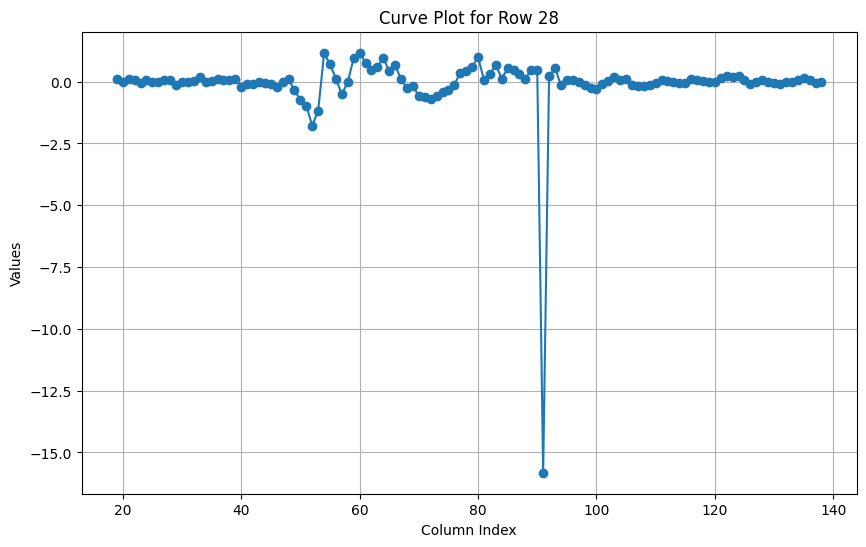

In [44]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_row_curve(df, row_index):
    # Ensure row_index is within the range of the DataFrame
    if row_index < 0 or row_index >= len(df):
        print("Row index is out of range.")
        return
    
    # Select the values from column 19 to column 138 (inclusive) in the specified row
    y_values = df.iloc[row_index, 19:139].values
    
    # Generate x values as a range for plotting
    x_values = range(19, 139)
    
    # Plot the curve
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, marker='o')
    plt.xlabel("Column Index")
    plt.ylabel("Values")
    plt.title(f"Curve Plot for Row {row_index}")
    plt.grid()
    plt.show()

# Example usage
plot_row_curve(combined_df, 28)

In [71]:
import pandas as pd
import numpy as np


# Calculate positive_max and negative_max
combined_df['positive_max'] = combined_df.loc[:, 19:138].apply(lambda x: x[x >= 0].max(), axis=1)
combined_df['negative_max'] = combined_df.loc[:, 19:138].apply(lambda x: x[x <= 0].min(), axis=1)

combined_df.head()

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,positive_max,negative_max
0,26/01/2005 17:49:45,300.641,0,1542,3,5,1,1,160.0,4.116579,...,0.024414,-0.097656,0.122070,0.097656,0.024414,NaN,2,Right,1.36719,-1.63574
1,26/01/2005 17:54:45,600.656,0,2777,3,5,1,1,160.0,4.116579,...,0.024414,0.000000,0.073242,0.146484,-0.073242,NaN,2,Right,1.31836,-3.78418
2,26/01/2005 17:59:46,901.156,0,4014,3,5,1,1,160.0,4.116579,...,0.048828,0.024414,-0.097656,-0.024414,0.000000,NaN,2,Right,1.19629,-1.85547
3,26/01/2005 18:04:46,1201.391,0,5249,3,5,1,1,160.0,4.116579,...,-0.146484,-0.195312,-0.170898,-0.097656,0.024414,NaN,2,Right,1.24512,-2.07520
4,26/01/2005 18:09:46,1502.000,0,6489,3,5,1,1,160.0,4.116579,...,0.000000,0.000000,0.024414,-0.097656,-0.122070,NaN,2,Right,1.36719,-2.27051


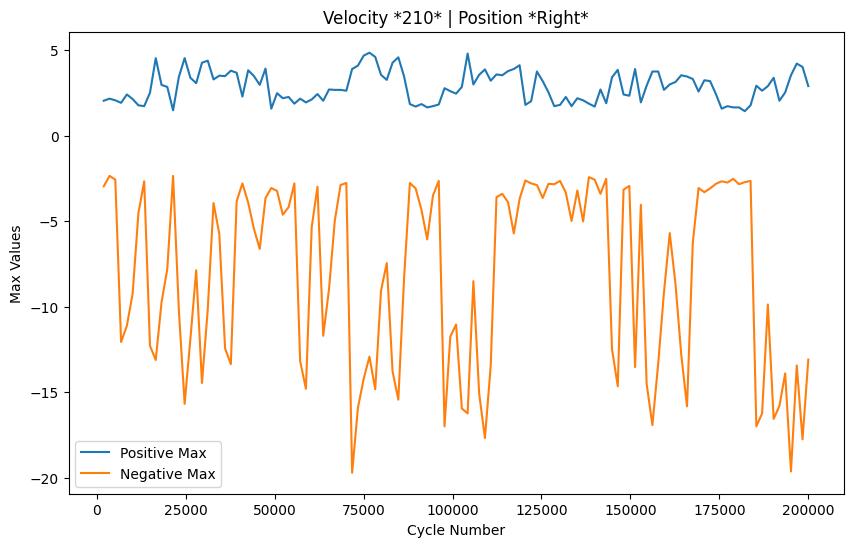

In [72]:
import matplotlib.pyplot as plt

# Assuming 'cycle_number' corresponds to column 3 in the given data
velocity = 210
position = 'Right'

df = combined_df[(combined_df[8]==velocity)&(combined_df[140]==2)&(combined_df[141]==position)]
cycle_number = df[3]

# Plotting positive_max and negative_max against cycle_number
plt.figure(figsize=(10, 6))
plt.plot(cycle_number, df['positive_max'], label='Positive Max')
plt.plot(cycle_number, df['negative_max'], label='Negative Max')

# Adding labels and title
plt.xlabel('Cycle Number')
plt.ylabel('Max Values')
plt.title(f'Velocity *{velocity}* | Position *{position}*')
plt.legend()
plt.show()


In [77]:
displacement_df[(displacement_df['velocity'] == 160) & (displacement_df['experiment_number'] == 2) & (displacement_df['position'] == 0)]

,Period,Cycle_Number,velocity,experiment_number,position,displacement,smoothed_displacement
0,300.641,1542,160.0,2,0,0.000197,0.000167
1,600.656,2777,160.0,2,0,0.000197,0.000169
2,901.156,4014,160.0,2,0,0.000187,0.000166
3,1201.391,5249,160.0,2,0,0.000205,0.000183
4,1502.000,6489,160.0,2,0,0.000190,0.000166
...,...,...,...,...,...,...,...
156,47179.187,194525,160.0,2,0,0.000185,0.000161
157,47479.891,195763,160.0,2,0,0.000190,0.000169
158,47780.484,197001,160.0,2,0,0.000195,0.000166
159,48080.625,198236,160.0,2,0,0.000185,0.000157


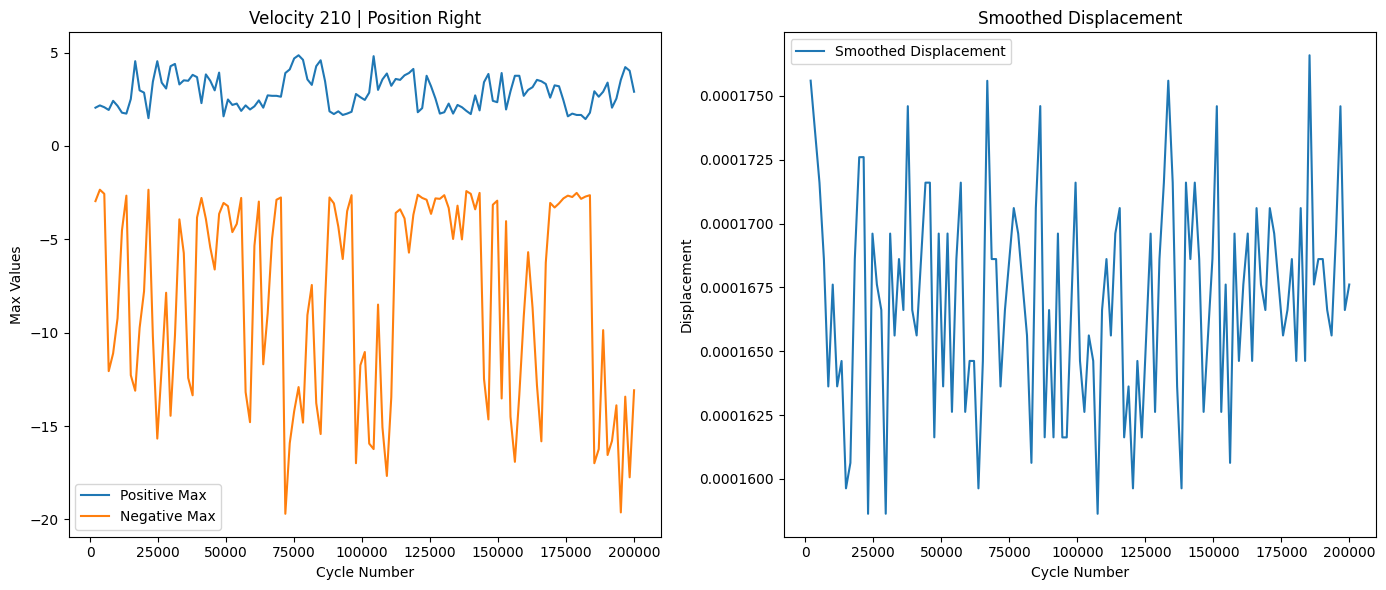

In [80]:
velocity = 210
position = 'Right'
disp_position = 0



# Filtering the required data based on the specified velocity and position
filtered_df = combined_df[(combined_df[8] == velocity) & (combined_df[140] == 2) & (combined_df[141] == position)]

filtered_disp_df = displacement_df[(displacement_df['velocity'] == velocity) & (displacement_df['experiment_number'] == 2) & (displacement_df['position'] == disp_position)]
cycle_number = filtered_df[3]

# Plotting positive_max and negative_max against cycle_number
plt.figure(figsize=(14, 6))

# First subplot for positive_max and negative_max
plt.subplot(1, 2, 1)
plt.plot(cycle_number, filtered_df['positive_max'], label='Positive Max')
plt.plot(cycle_number, filtered_df['negative_max'], label='Negative Max')
plt.xlabel('Cycle Number')
plt.ylabel('Max Values')
plt.title(f'Velocity {velocity} | Position {position}')
plt.legend()

# Second subplot for smoothed_displacement and displacement
plt.subplot(1, 2, 2)
# plt.plot(filtered_disp_df['Cycle_Number'], filtered_disp_df['displacement'], label='Displacement')
plt.plot(filtered_disp_df['Cycle_Number'], filtered_disp_df['smoothed_displacement'], label='Smoothed Displacement')
plt.xlabel('Cycle Number')
plt.ylabel('Displacement')
plt.title('Smoothed Displacement')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\alira\AppData\Local\Temp\ipykernel_7432\1969708716.py:11: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(


Correlation Matrix:
                       positive_max  negative_max  smoothed_displacement
positive_max               1.000000     -0.936608               0.376088
negative_max              -0.936608      1.000000              -0.304529
smoothed_displacement      0.376088     -0.304529               1.000000


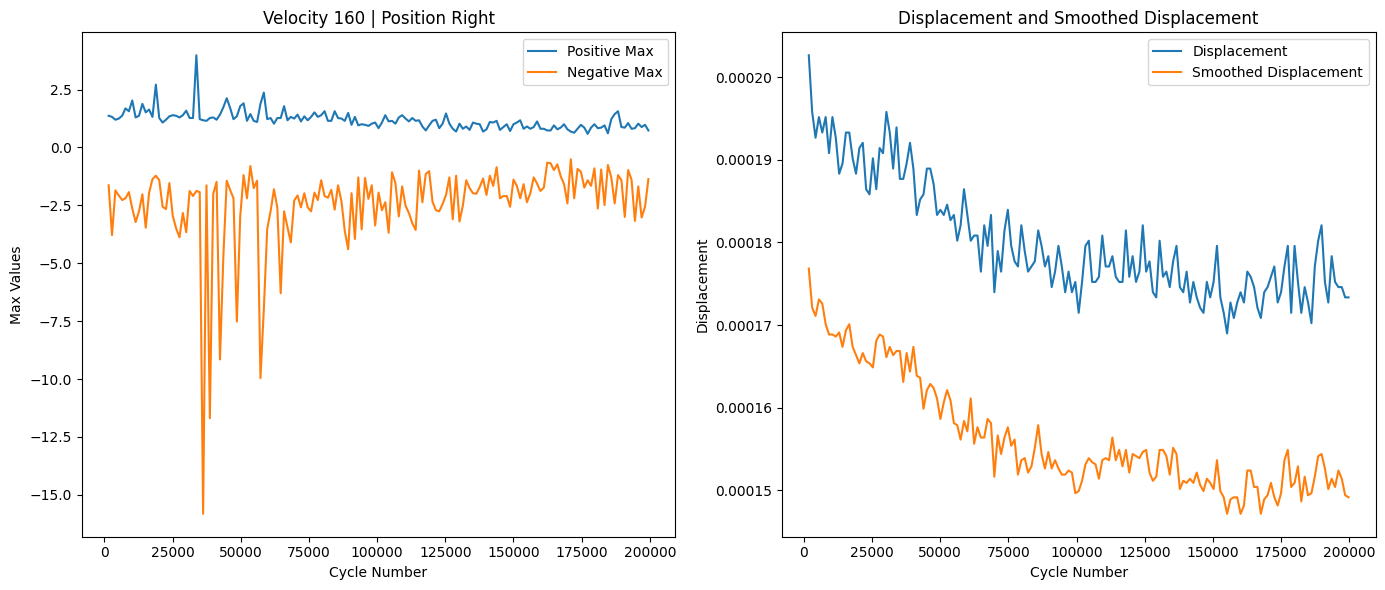

In [ ]:
# Define parameters
velocity = 160
position = 'Right'
disp_position = 0

# Filtering combined_df and displacement_df based on specified conditions
filtered_df = combined_df[(combined_df[8] == velocity) & (combined_df[140] == 2) & (combined_df[141] == position)]
filtered_disp_df = displacement_df[(displacement_df['velocity'] == velocity) & (displacement_df['position'] == disp_position)]

# Merging filtered data on cycle number for correlation analysis
merged_df = pd.merge(
    combined_df[[3, 'positive_max', 'negative_max']],
    filtered_disp_df[['Cycle_Number', 'smoothed_displacement']],
    left_on=3, right_on='Cycle_Number',
    how='inner'
)

# Calculating the correlation matrix
correlation_matrix = merged_df[['positive_max', 'negative_max', 'smoothed_displacement']].corr()

# Displaying the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plotting the data
plt.figure(figsize=(14, 6))

# First subplot for positive_max and negative_max
plt.subplot(1, 2, 1)
plt.plot(filtered_df[3], filtered_df['positive_max'], label='Positive Max')
plt.plot(filtered_df[3], filtered_df['negative_max'], label='Negative Max')
plt.xlabel('Cycle Number')
plt.ylabel('Max Values')
plt.title(f'Velocity {velocity} | Position {position}')
plt.legend()

# Second subplot for smoothed_displacement and displacement
plt.subplot(1, 2, 2)
plt.plot(filtered_disp_df['Cycle_Number'], filtered_disp_df['displacement'], label='Displacement')
plt.plot(filtered_disp_df['Cycle_Number'], filtered_disp_df['smoothed_displacement'], label='Smoothed Displacement')
plt.xlabel('Cycle Number')
plt.ylabel('Displacement')
plt.title('Displacement and Smoothed Displacement')
plt.legend()

plt.tight_layout()
plt.show()